#### HEATMAPPING
In this notebook, I tested methods of heatmapping.

In [14]:
#Dario testing if he can plot following Dataset: "P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv" in a Heatmap with the DMS scores as a metric

In [15]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
#Here, the new variable 'Dataset1' (of type DataFrame) reads the following file. The 'pd.' indicates that it is a command from the 'pandas' package
Datensatz1 = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv')
#Now I separate the values of 'mutant' as they are given in the format original amino acid position new amino acid, in order to plot the new amino acids against the corresponding position.
#Here, in a new column of 'Datensatz1' called 'PositionDerMutation', the position (i.e., the numerical value) is extracted and saved.
Datensatz1['PositionDerMutation'] = Datensatz1["mutant"].apply(lambda x: re.search(r'\d+', x).group())
#Here, in a new column of 'Datensatz1' called 'Alte_AS', the original amino acid is extracted and saved.
Datensatz1['Alte_AS'] = Datensatz1["mutant"].apply(lambda x: re.search(r'[A-Z]', x).group())
#Here, in a new column of 'Datensatz2' called 'Neue_AS', the new (mutated) amino acid is extracted and saved."
Datensatz1['Neue_AS'] = Datensatz1["mutant"].apply(lambda x: re.search(r'[A-Z]\d+([A-Z])', x).group(1))
#The original data and the newly obtained data are now combined in a new ".csv" file named "DarioHeatMapTest".
Datensatz1.to_csv('DarioHeatMapTest.csv', index=False)


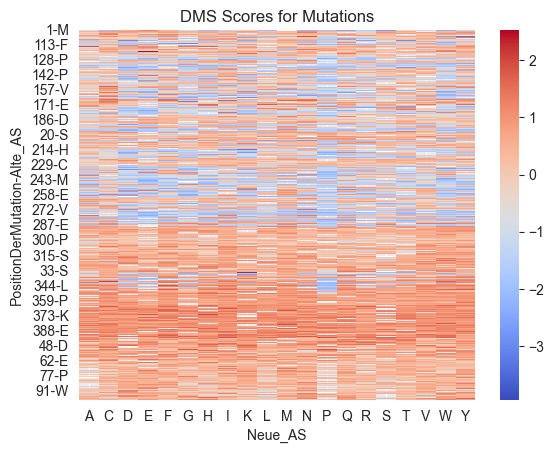

In [17]:
# The variable "HeatMapTest" (of type pandas.core.frame.DataFrame) is created, which will be converted into a heatmap.
# The columns of the heatmap are given by "New_AA" from "Dataset1", and the rows are given by "MutationPosition" and "Old_AA".
HeatMapTest = Datensatz1.pivot(index=['PositionDerMutation', 'Alte_AS'], columns='Neue_AS', values='DMS_score')
# Creating a heatmap using the data from "HeatMapTest" and the color scheme "coolwarm" using the "seaborn" package.
sns.heatmap(HeatMapTest, cmap='coolwarm')
# Setting the title of the heatmap to "DMS Scores for Mutations".
plt.title('DMS Scores for Mutations')
# Displaying the heatmap.
plt.show()
